In [1]:
# this might be necessary on some computers
from julia.api import Julia
jl = Julia(compiled_modules=False)


In [13]:
# Installation
# this is needed only once :)
import julia
#julia.install() 
from julia import Pkg
Pkg.activate(".")
Pkg.add("Unfold")
Pkg.add(["Pandas","DataFrames"]) # for conversion of DataFrames 


In [4]:
# might take some time to load first time, due to precompilation
from julia import Unfold

In [114]:
# load an MNE example dataset for regression
from mne.datasets.limo import load_data
epoched = load_data(subject=1)
epoched.resample(128) #speed up things
evts = epoched.metadata
data  = epoched.get_data().transpose((1,2,0))
times = epoched.times


Adding metadata with 2 columns
Replacing existing metadata with 2 columns
1055 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [163]:
from julia import Main
Main.eval("using StatsModels") # can be removed from Unfold 0.3.5 on, automatically exports @formula


formula = Main.eval("@formula 0~1+phaseCoh")
#formula = Main.eval("@formula 0~1")

# we have to reconstruct the dataframe, I couldnt find a way to convert the dataframe DataFrames.DataFrame(Pandas.DataFrame(evts)) should wokr in theory, but throws an error
evt_df = DataFrames.DataFrame(phaseCoh=evts["phase-coherence"].values)

# why times.tolist()? I dont know, for somereason pycall doesnt like it without. This could be resolved in future pycall versions
res = Unfold.fit(Unfold.UnfoldLinearModel,formula,evt_df,data*10**6,times.tolist() )

<AxesSubplot:xlabel='colname_basis', ylabel='estimate'>

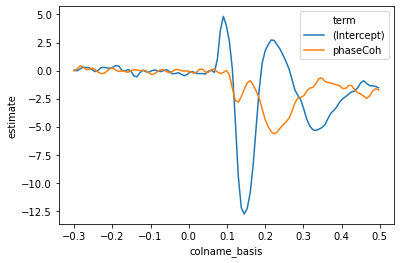

In [164]:
#import matplotlib.pyplot as plt
import seaborn as sbn
#df.groupby("term")
df = Pandas.DataFrame(res[1]) # conversion back to python
df2 = df[df.channel==32+11]
sbn.lineplot(x = df2.colname_basis,y=df2.estimate,hue=df2.term)

